<a href="https://colab.research.google.com/github/MonikaGost/Winc/blob/master/Highest_Co2_decreases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

which countries are making the biggest strides in decreasing CO2 output?
You'll need to find the relative CO2 output for each country to be able to calculate this. But countries can have growing and shrinking populations too, so it's probably a good idea to take this into account as well.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

### **Looking at CO2 emissions data per country**

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/co2-emissions-and-gdp.csv")
# source: https://ourworldindata.org/co2-and-greenhouse-gas-emissions#co2-embedded-in-trade
# Consumption-based emissions are national emissions that have been adjusted for trade. This measures fossil

In [ ]:
display(df1)
df1.rename(columns= {"Annual consumption-based CO₂ emissions":"CO₂"}, inplace=True)
df1.drop(columns = ["Code","GDP, PPP (constant 2017 international $)","Annual CO₂ emissions"], inplace=True)
df1.set_index("Entity",inplace=True)

In [ ]:
df1_unique = df1.index.unique()
display(len(df1_unique)) # we have 262 unique 'country' names but some of them aren't countries, I remove these rows in next step
display(list(df1_unique))

In [ ]:
# Removing no countries:
df1_drop = ['Africa','Africa (GCP)','Asia','Asia (GCP)','Asia (excl. China and India)','Central African Republic','Central America (GCP)','East Asia and Pacific (WB)',
 'Europe','Europe (GCP)','Europe (excl. EU-27)','Europe (excl. EU-28)','Europe and Central Asia (WB)','European Union (27)','European Union (27) (GCP)','European Union (28)',
 'High-income countries','International transport','Kuwaiti Oil Fires (GCP)','Latin America and Caribbean (WB)','Low-income countries','Lower-middle-income countries',
 'Middle East (GCP)','Middle East and North Africa (WB)','Middle-income countries','Non-OECD (GCP)','North America','North America (GCP)','North America (WB)',
 'North America (excl. USA)','OECD (GCP)','Oceania','Oceania (GCP)','South America','South America (GCP)','South Asia (WB)','Sub-Saharan Africa (WB)',
 'Upper-middle-income countries','West Bank and Gaza','World']
df1.drop( index = df1_drop, axis=0, inplace=True) # we have 222 unique country names left

In [ ]:
df1 # for some years a lot of data is missing

In [ ]:
Co2 = pd.pivot_table(df1, values="CO₂", index=["Entity"], columns=["Year"])
display(Co2) # we have 120 countries left for year spam 1990-2020, for previous years there wwas no data
list(Co2.isnull().sum())# not many data missing now

In [ ]:
Co2
Co2.dropna(inplace=True) # 117 countries left
display(Co2)

**Calculating relative change in CO2 output for 2021**

---



In [ ]:
Co2["dev2020"] = (Co2[2020]-Co2[1990])/Co2[1990]

In [ ]:
Co2.sort_values(by='Entity')

**Sorting the data frame by CO2 change and retriving the list of top 10 countries with biggest relative change in CO2 output**

---



In [ ]:
Co2.sort_values(by="dev2020", ascending=True, inplace=True)

top10 = Co2.head(10)
display(top10)
top10.index # we have here: ['Ukraine', 'Estonia', 'Lithuania', 'Romania', 'Slovakia', 'Greece','Bulgaria', 'Finland', 'Kazakhstan', 'Zimbabwe']

**Calculating relative change for all columns(years), so I can plot the change over the years**

---



In [ ]:
def count_relative_change(df):
  for column in df.columns:
    new_col = 'dev_' + str(column)
    df[new_col] = (df[column]-df[1990])/df[1990]
    if column == 2020:
      break
  return df

In [ ]:
count_relative_change(top10)

**Plotting the results**

---



In [ ]:
top10.columns

* **I make a data frame with CO2 relative changes only, will use it to make a graph**


In [ ]:
top10_graph = top10.iloc[0:10, 33:64].copy()

display(top10_graph)

* **Changing columns names to get only years in the name of the columns (looks better on a graph)**



In [ ]:
top10_graph.columns

In [ ]:
def rename_columns(df):
  for column in df.columns:
    new_name = int(str(column)[4:])
    if "dev" in column:
      df.rename(columns= {column:new_name}, inplace=True)
  return (df)

In [ ]:
rename_columns(top10_graph)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Entity,,,,,,,,,,,,,,,,,,,,,
Ukraine,0.00,-0.09,-0.12,-0.26,-0.45,-0.57,-0.43,-0.45,-0.51,-0.53,...,-0.46,-0.45,-0.45,-0.55,-0.63,-0.64,-0.64,-0.57,-0.59,-0.62
Estonia,0.00,-0.03,-0.23,-0.43,-0.47,-0.50,-0.47,-0.49,-0.46,-0.37,...,-0.38,-0.44,-0.45,-0.45,-0.42,-0.47,-0.46,-0.43,-0.53,-0.60
Lithuania,0.00,0.06,0.22,-0.25,-0.33,-0.35,-0.47,-0.50,-0.49,-0.54,...,-0.45,-0.51,-0.51,-0.51,-0.52,-0.50,-0.48,-0.46,-0.49,-0.53
Romania,0.00,-0.19,-0.25,-0.31,-0.35,-0.34,-0.37,-0.44,-0.45,-0.51,...,-0.41,-0.43,-0.51,-0.49,-0.50,-0.49,-0.47,-0.45,-0.47,-0.50
Slovakia,0.00,-0.22,-0.23,-0.29,-0.39,-0.36,-0.34,-0.35,-0.34,-0.38,...,-0.33,-0.41,-0.41,-0.46,-0.45,-0.44,-0.44,-0.42,-0.45,-0.49
Greece,0.00,-0.01,0.08,0.03,0.03,0.04,0.02,0.04,0.11,0.07,...,-0.14,-0.22,-0.34,-0.37,-0.41,-0.40,-0.40,-0.39,-0.45,-0.45
Bulgaria,0.00,-0.27,-0.31,-0.26,-0.32,-0.24,-0.20,-0.24,-0.25,-0.32,...,-0.23,-0.28,-0.37,-0.36,-0.34,-0.35,-0.33,-0.33,-0.35,-0.41
Finland,0.00,-0.08,0.29,0.06,-0.03,-0.07,-0.07,-0.09,-0.11,-0.08,...,-0.12,-0.16,-0.18,-0.24,-0.32,-0.29,-0.31,-0.28,-0.34,-0.41
Kazakhstan,0.00,-0.27,-0.55,-0.41,-0.49,-0.54,-0.59,-0.61,-0.60,-0.65,...,-0.57,-0.56,-0.47,-0.43,-0.28,-0.33,-0.30,-0.37,-0.41,-0.36


* **Plotting the data frame**

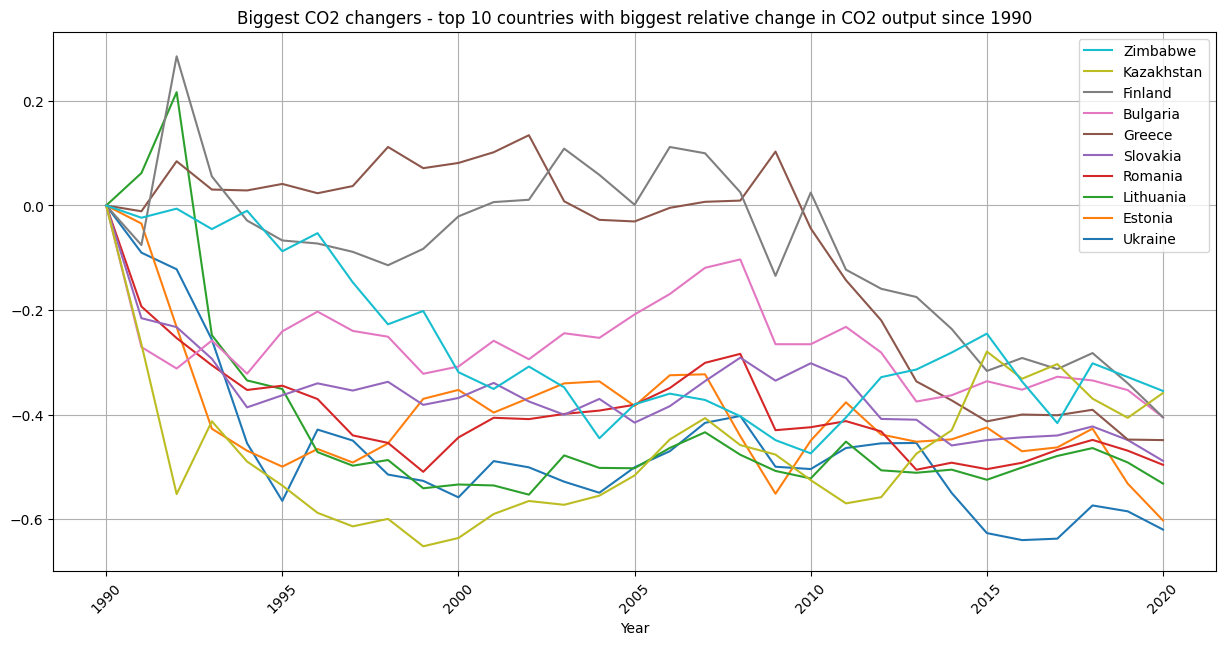

In [ ]:
fig, ax = plt.subplots()
years = top10_graph.columns


for index, row in top10_graph.iterrows():
    plt.plot(years, row, label = index)

plt.title("Biggest CO2 changers - top 10 countries with biggest relative change in CO2 output since 1990")
plt.xlabel("Year")
plt.ylabel="Relative change in CO2 output (%)"
plt.legend()
plt.grid()
fig.set_size_inches(15,7)
plt.xticks(rotation=45)
# I want to change order of the legend:
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [9,8,7,6,5,4,3,2,1,0]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

### **Looking at population data**

---



In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/population-and-demography.csv")

In [ ]:
#display(df2)
df2.rename(columns={"Country name":"Entity"},inplace=True)
population = df2.loc[:,"Entity":"Population"]

population.set_index("Entity",inplace=True)
population.sort_values(by="Population", ascending=False, inplace=True)
#display(population)

unique_population = population.index.unique()
display(len(unique_population)) # we have 254 unique 'country' names
display(list(unique_population)) # There are some "no countries" on the list, I remove them in next step.

In [ ]:
df2_drop = ['World','Less developed regions','Less developed regions, excluding least developed countries','Less developed regions, excluding China',
            'Asia (UN)','Lower-middle-income countries','Upper-middle-income countries','Africa (UN)','More developed regions','High-income countries',
            'Least developed countries','Europe (UN)','Low-income countries','Latin America and the Caribbean (UN)','Land-locked developing countries (LLDC)',
            'Northern America (UN)','Oceania (UN)']
population.drop(index = df2_drop, axis=0, inplace=True)
unique_population = population.index.unique()
display(len(unique_population)) # we have 237 unique country names left

237

In [ ]:
population

In [ ]:
population2= pd.pivot_table(population, values="Population", index=["Entity"], columns=["Year"])
population2
# I want to compare this with CO2 data frame, so will look at the same years
population_years=population2.loc[:,1990:2020]
display(population_years)
population_10 = population_years.loc[pd.Index(['Ukraine', 'Estonia', 'Lithuania', 'Romania', 'Slovakia', 'Greece','Bulgaria', 'Finland', 'Kazakhstan', 'Zimbabwe']),:]
population_10

In [ ]:
count_relative_change(population_10)

In [ ]:
population_graph=population_10.iloc[:,31:62].copy()
rename_columns(population_graph)


In [ ]:
display(top10_graph)
display(population_graph)

In [ ]:
def graph_CO2_population(country,df1,df2):
    dco2 = df1.loc[(df1.index == country)].T
    dco2.rename(columns={country:"CO2"},inplace=True)

    dpopulation = df2.loc[(df2.index == country)].T
    dpopulation.rename(columns={country:"Population"},inplace=True)

    df = pd.merge(dco2, dpopulation, how='outer', on ="Year")

    x = df.index
    CO2 = df.CO2
    Population=df.Population

    plt.plot(x,CO2, label="CO2")
    plt.plot(x,Population, label="Population")
    plt.legend()
    plt.ylabel=("Relative change in %")
    plt.title(f"Relative change of CO2 output vs. relative change in population growth of {country} during years 1990-2020")
    plt.grid()
    plt.show()

In [ ]:
biggest_relative_changers=['Ukraine', 'Estonia', 'Lithuania', 'Romania', 'Slovakia', 'Greece','Bulgaria', 'Finland', 'Kazakhstan', 'Zimbabwe']

def make_graph1 (list):
    for country in list:
      graph_CO2_population(country,top10_graph, population_graph)

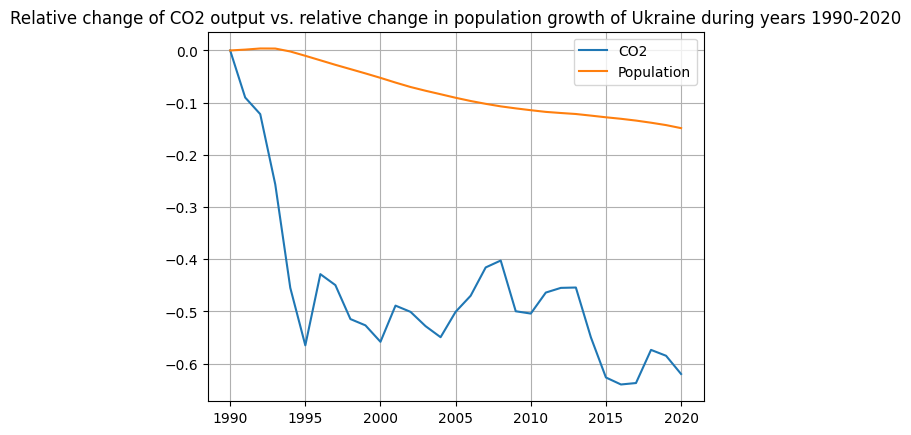

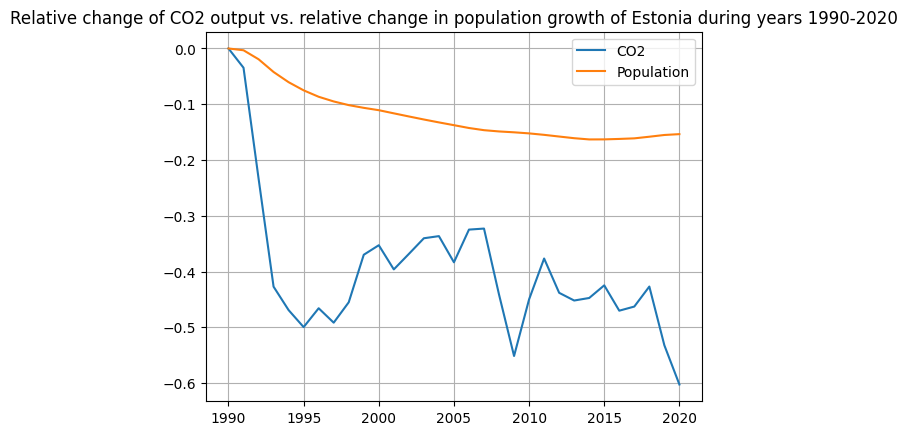

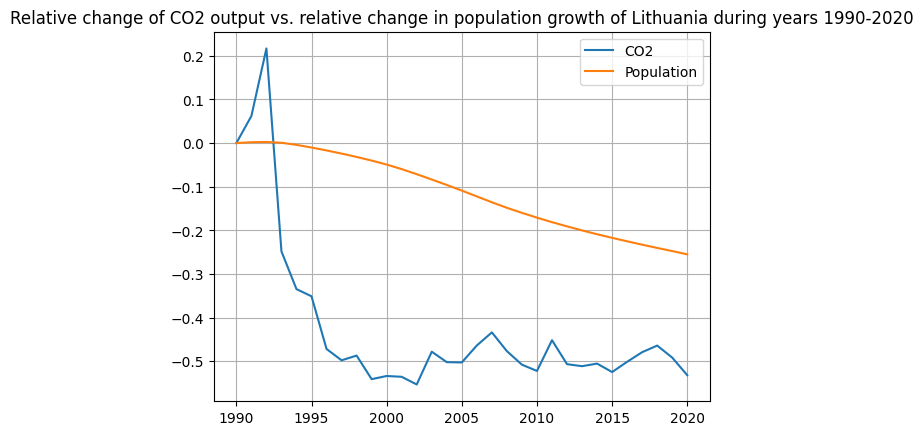

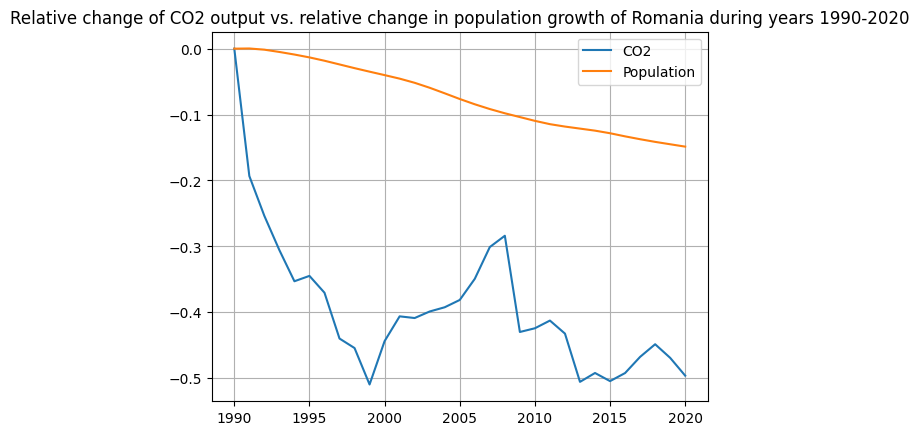

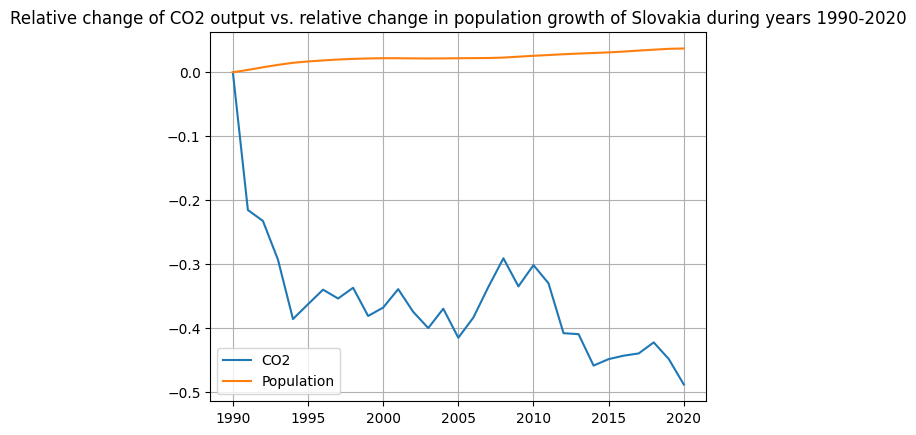

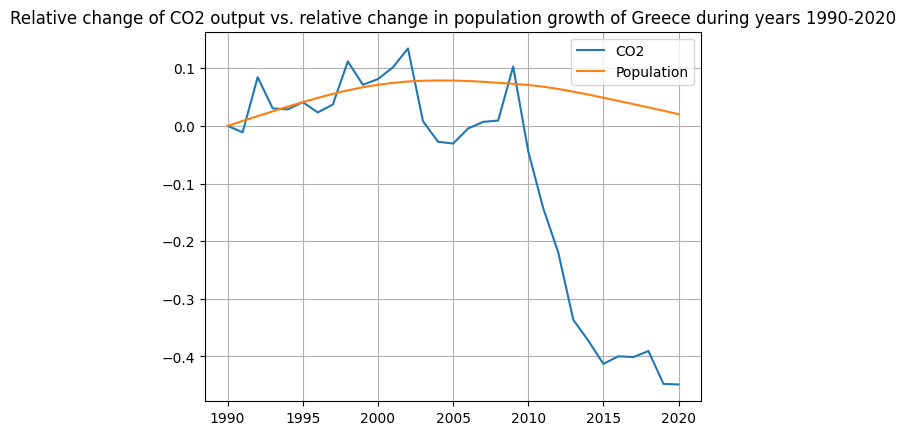

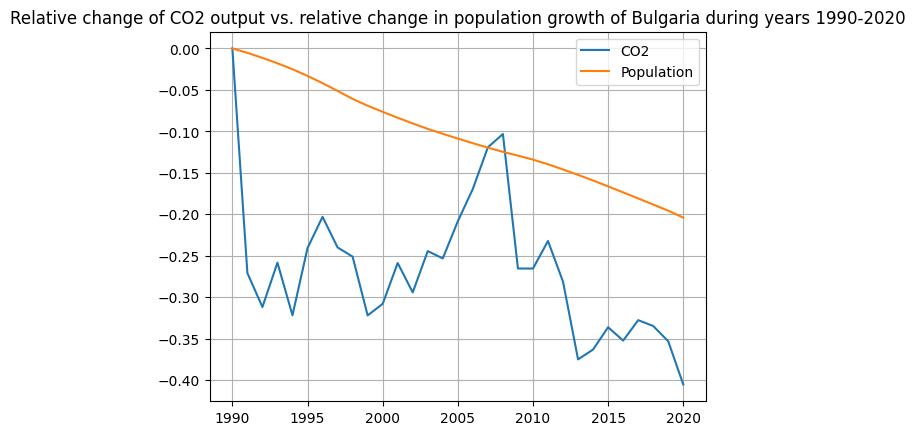

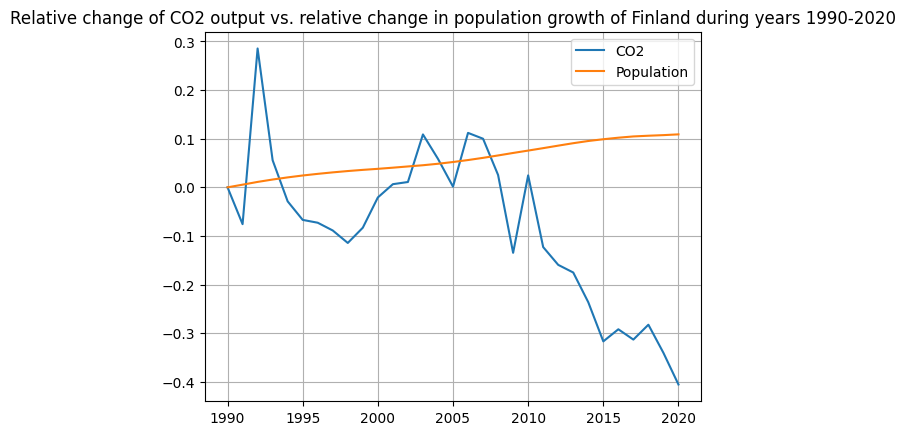

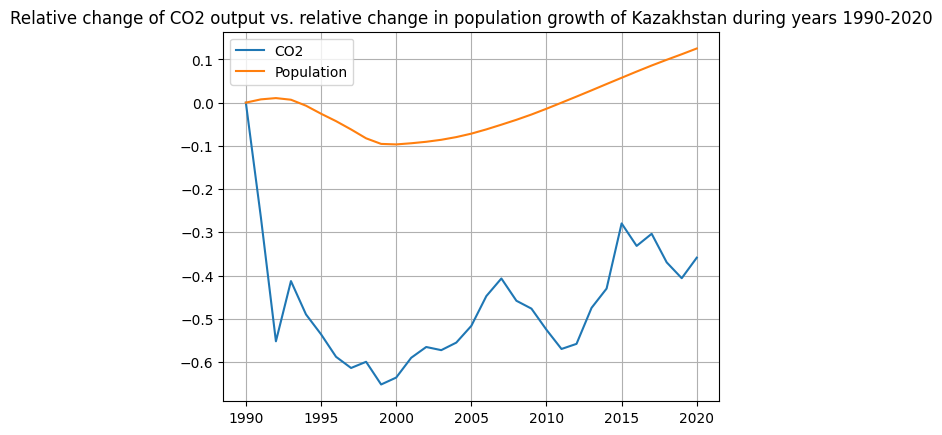

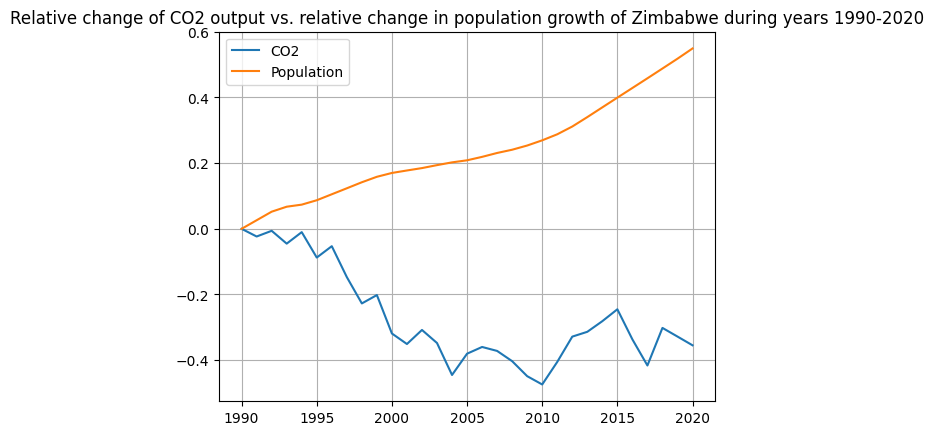

In [ ]:
make_graph1 (biggest_relative_changers)

**Plotting relative changes in CO2 and population. All countries 2020.**

In [ ]:
Co2
Co2all = pd.DataFrame(Co2.loc[:,"dev2020"])
Co2all.rename(columns={"dev2020":"devCO2"},inplace=True)

In [ ]:
population_years
population_30=pd.DataFrame(population_years.loc[:,[1990,2021]])
population_30
count_relative_change(population_30)
population_all = pd.DataFrame(population_30.loc[:,"dev_2021"])
population_all.rename(columns={"dev_2021":"devPopulation"},inplace=True)

In [ ]:
display(Co2all)
display(population_all)

In [ ]:
CO2_vs_Population = pd.merge(Co2all, population_all, how='outer', on ="Entity")
display(CO2_vs_Population)
CO2_vs_Population.dropna(inplace=True) # dropping rows with missing values. Wa have 237 countries

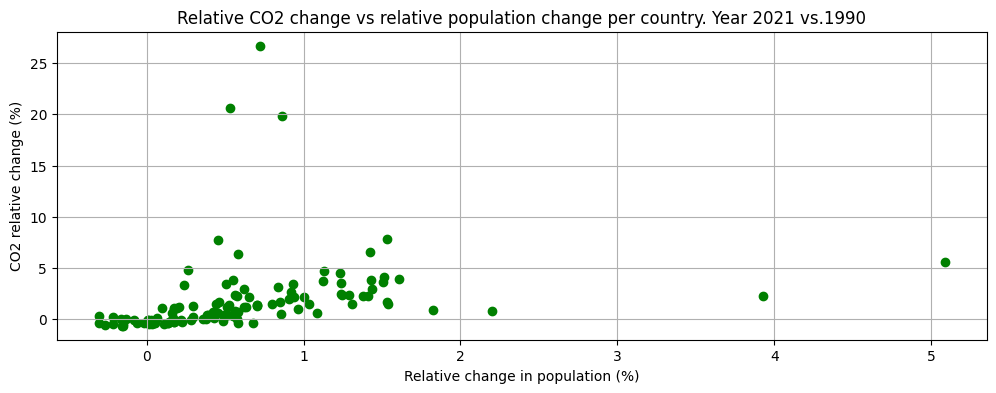

In [ ]:
x2=CO2_vs_Population['devPopulation']
y2=CO2_vs_Population['devCO2']

plt.figure(figsize=(12,4))

plt.scatter(x2,y2 , c = "green")

plt.xlabel("Relative change in population (%)")
plt.ylabel("CO2 relative change (%)")
plt.title("Relative CO2 change vs relative population change per country. Year 2021 vs.1990")
plt.grid()
#plt.xscale("log")
#plt.yscale("log")

plt.show()

### **Looking at biggest CO2 emitters**

I am looking on the countries with biggest CO2 output in 1990 and how is that changed over the years. Zooming in on 10 countries.

Text(0.5, 1.0, 'CO2 output share per country in 1990')

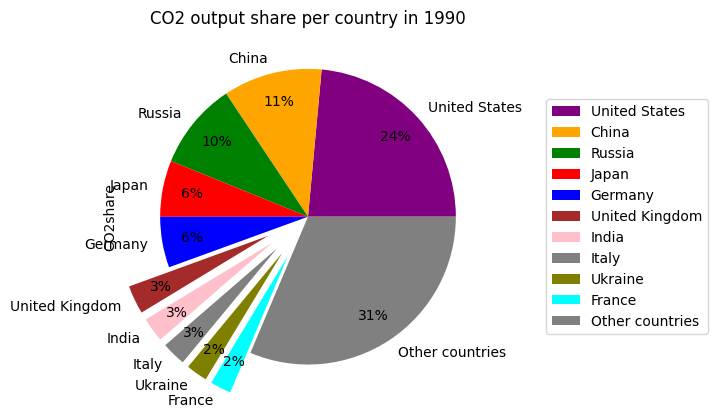

In [ ]:
Co2 # 117 countries. I look which coubtries where the biggest emitors in 1990

Co2.sort_values(by=1990, ascending =False, inplace=True) # sorting by Co2 output in 1990

# Calculating share of all CO2 emissions in 1990
Co2[1990].sum() # 21552214608.489998
Co2["CO2share"]=(Co2[1990]/(21552214608.489998))*100


#Zooming in on 10 biggest pollutors:
biggest_Co2_share = Co2.loc[:,["CO2share"]].head(10)
#display(biggest_Co2_share)
biggest_Co2_share["CO2share"].sum() # 10 top countries were in 1990 responsible for 68% of all CO2 emissions

# Making a row "others" with rest of the countries summed up in one row, this for a better visibility of a pie plot
others = Co2.tail(110)
others["CO2share"].sum() #result: 31.22865017703883 %
new_row = pd.DataFrame([{"Entity":'Other countries', 'CO2share':31.23}])
new_row.set_index("Entity", inplace=True)

# making a df for graph:
CO2_share_graph = pd.concat([biggest_Co2_share, new_row], ignore_index=False)
#display(CO2_share_graph)

#Plotting the results:
CO2_share_graph.CO2share.plot.pie(autopct = "%1.0f%%", pctdistance=0.8,
                                  colors =['purple','orange','green','red','blue','brown','pink','gray','olive','cyan','grey'],
                                  explode=[0,0,0,0,0, 0.3, 0.3, 0.3,0.3, 0.3, 0])
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.title("CO2 output share per country in 1990")


Text(0.5, 1.0, 'CO2 output share per country in 2020')

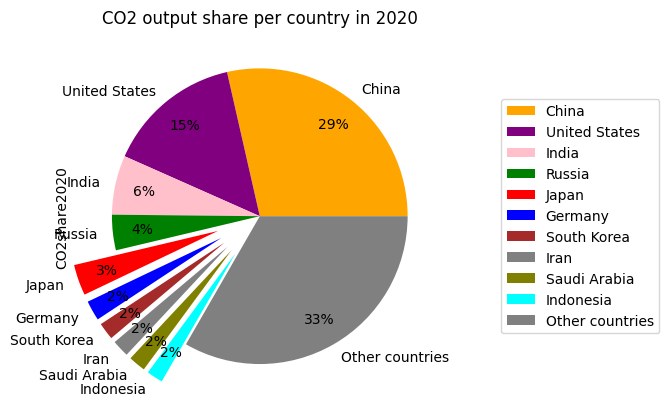

In [ ]:
Co2.sort_values(by=2020, ascending =False, inplace=True) # sorting by Co2 output in 2020

# Calculating share of all CO2 emissions in 2020
total2020 = Co2[2020].sum()
Co2["CO2share2020"]=(Co2[2020]/total2020)*100


#Zooming in on 10 biggest pollutors:
biggest_Co2_share20 = Co2.loc[:,["CO2share2020"]].head(10)
#display(biggest_Co2_share20)
biggest_Co2_share20["CO2share2020"].sum() # 10 top countries were in 1990 responsible for 71 % of all CO2 emissions

# Making a row "others" with rest of the countries summed up in one row, this for a better visibility of a pie plot
others2020 = Co2.tail(110)
b=others2020["CO2share2020"].sum() #result: 31.22865017703883 %
new_row2020 = pd.DataFrame([{"Entity":'Other countries', 'CO2share2020':b}])
new_row2020.set_index("Entity", inplace=True)

# making a df for graph:
CO2_share2020_graph = pd.concat([biggest_Co2_share20, new_row2020], ignore_index=False)
#display(CO2_share2020_graph)

#Plotting the results:
CO2_share2020_graph.CO2share2020.plot.pie(autopct = "%1.0f%%", pctdistance=0.8,
                                          colors =['orange','purple','pink','green','red','blue','brown','gray','olive','cyan','grey'],
                                          explode=[0,0,0,0, 0.3, 0.3, 0.3, 0.3,0.3, 0.3, 0])
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.title("CO2 output share per country in 2020")


In [ ]:
biggest_Co2 = Co2.head(10).copy()
biggest_Co2.sort_values(by="dev2020", ascending =True, inplace=True)
biggest_Co2.index

Index(['Ukraine', 'Germany', 'Russia', 'Italy', 'United Kingdom', 'France',
       'Japan', 'United States', 'India', 'China'],
      dtype='object', name='Entity')

In [ ]:
count_relative_change(biggest_Co2)
biggestCo2_graph = biggest_Co2.iloc[0:10, 33:64].copy()
rename_columns(biggestCo2_graph)

In [ ]:
display(biggestCo2_graph)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Entity,,,,,,,,,,,,,,,,,,,,,
Ukraine,0.00,-0.09,-0.12,-0.26,-0.45,-0.57,-0.43,-0.45,-0.51,-0.53,...,-0.46,-0.45,-0.45,-0.55,-0.63,-0.64,-0.64,-0.57,-0.59,-0.62
Germany,0.00,-0.04,0.01,-0.03,-0.05,-0.05,-0.06,-0.10,-0.10,-0.09,...,-0.17,-0.23,-0.22,-0.24,-0.25,-0.24,-0.25,-0.26,-0.29,-0.35
Russia,0.00,0.02,-0.62,-0.45,-0.42,-0.43,-0.39,-0.42,-0.48,-0.50,...,-0.30,-0.28,-0.30,-0.32,-0.35,-0.33,-0.32,-0.34,-0.32,-0.33
Italy,0.00,-0.01,0.08,-0.01,-0.04,-0.01,-0.07,-0.06,-0.04,-0.01,...,0.03,-0.07,-0.13,-0.16,-0.20,-0.22,-0.21,-0.20,-0.23,-0.31
United Kingdom,0.00,0.01,0.04,-0.02,-0.03,-0.04,0.01,0.01,0.04,0.02,...,-0.08,-0.05,-0.07,-0.11,-0.12,-0.14,-0.18,-0.20,-0.23,-0.31
France,0.00,0.02,0.11,0.02,-0.00,0.02,0.02,-0.01,0.03,0.04,...,0.02,-0.02,-0.05,-0.11,-0.14,-0.12,-0.13,-0.13,-0.16,-0.24
Japan,0.00,0.01,0.08,0.06,0.11,0.14,0.13,0.11,0.04,0.11,...,0.16,0.20,0.16,0.10,0.03,0.01,-0.01,-0.03,-0.05,-0.10
United States,0.00,-0.02,0.02,0.03,0.05,0.06,0.10,0.12,0.15,0.19,...,0.15,0.12,0.14,0.16,0.15,0.12,0.12,0.15,0.13,0.03
India,0.00,0.04,0.12,0.13,0.19,0.25,0.34,0.40,0.43,0.57,...,1.86,2.16,2.16,2.46,2.70,2.84,2.98,3.23,3.29,2.96


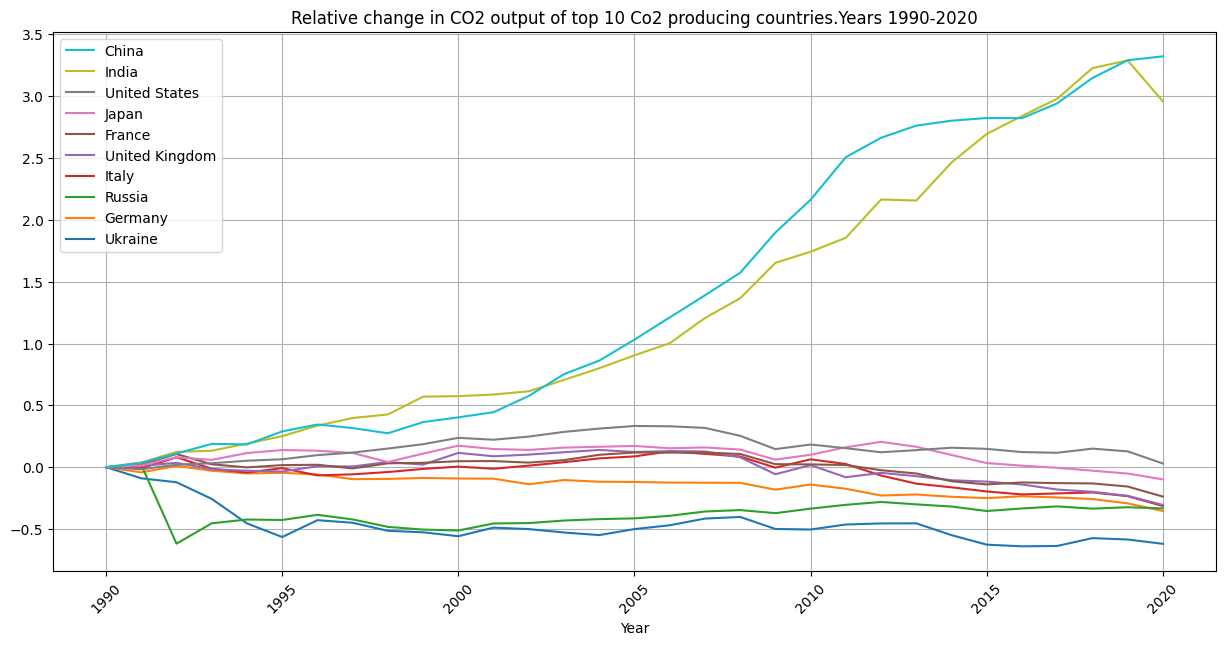

In [ ]:
fig, ax = plt.subplots()
years_biggestCO2 = biggestCo2_graph.columns


for index, row in biggestCo2_graph.iterrows():
    plt.plot(years_biggestCO2, row, label = index)

plt.title("Relative change in CO2 output of top 10 Co2 producing countries.Years 1990-2020")
plt.xlabel("Year")
plt.ylabel="Relative change in CO2 output (%)"
plt.legend()
plt.grid()
fig.set_size_inches(15,7)
plt.xticks(rotation=45)


# I want to change order of the legend:
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [9,8,7,6,5,4,3,2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

Text(0.5, 1.0, 'CO2 output share per country in 1990')

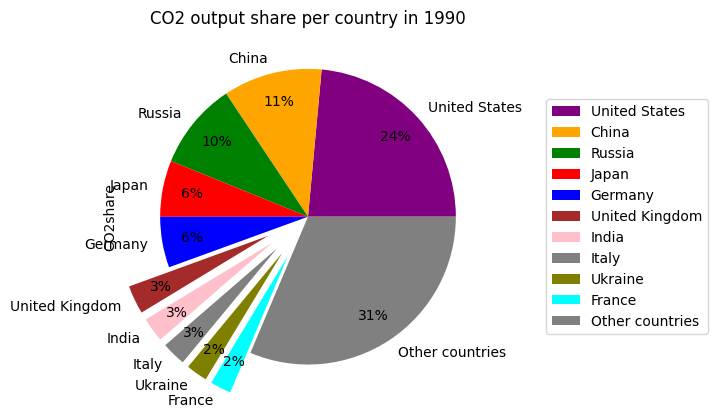

In [ ]:
Co2 # 117 countries. I look which coubtries where the biggest emitors in 1990

Co2.sort_values(by=1990, ascending =False, inplace=True) # sorting by Co2 output in 1990

# Calculating share of all CO2 emissions in 1990
Co2[1990].sum() # 21552214608.489998
Co2["CO2share"]=(Co2[1990]/(21552214608.489998))*100


#Zooming in on 10 biggest pollutors:
biggest_Co2_share = Co2.loc[:,["CO2share"]].head(10)
#display(biggest_Co2_share)
biggest_Co2_share["CO2share"].sum() # 10 top countries were in 1990 responsible for 68% of all CO2 emissions

# Making a row "others" with rest of the countries summed up in one row, this for a better visibility of a pie plot
others = Co2.tail(110)
others["CO2share"].sum() #result: 31.22865017703883 %
new_row = pd.DataFrame([{"Entity":'Other countries', 'CO2share':31.23}])
new_row.set_index("Entity", inplace=True)

# making a df for graph:
CO2_share_graph = pd.concat([biggest_Co2_share, new_row], ignore_index=False)
#display(CO2_share_graph)

#Plotting the results:
CO2_share_graph.CO2share.plot.pie(autopct = "%1.0f%%", pctdistance=0.8,
                                  colors =['purple','orange','green','red','blue','brown','pink','gray','olive','cyan','grey'],
                                  explode=[0,0,0,0,0, 0.3, 0.3, 0.3,0.3, 0.3, 0])
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.title("CO2 output share per country in 1990")


In [ ]:
biggest_Co2_share.index

# ['United States', 'China', 'Russia', 'Japan', 'Germany','United Kingdom', 'India', 'Italy', 'Ukraine', 'France']

In [ ]:
population_share1990 = population_years.loc[pd.Index(['United States', 'China', 'Russia', 'Japan', 'Germany','United Kingdom', 'India', 'Italy', 'Ukraine', 'France']),:]
count_relative_change(population_share1990)
population1990_graph=population_share1990.iloc[:,31:62].copy()
rename_columns(population1990_graph)

In [ ]:
population1990_graph

Getting top 1990 polluters from CO2 output list and calculating relative change for these

In [ ]:
Co2.sort_values(by=1990, ascending =False, inplace=True)
CO2_1990 = Co2.head(10)

In [ ]:
count_relative_change(CO2_1990)

In [ ]:
CO2_1990_graph = CO2_1990.iloc[0:10, 34:65].copy()
CO2_1990_graph
rename_columns(CO2_1990_graph)

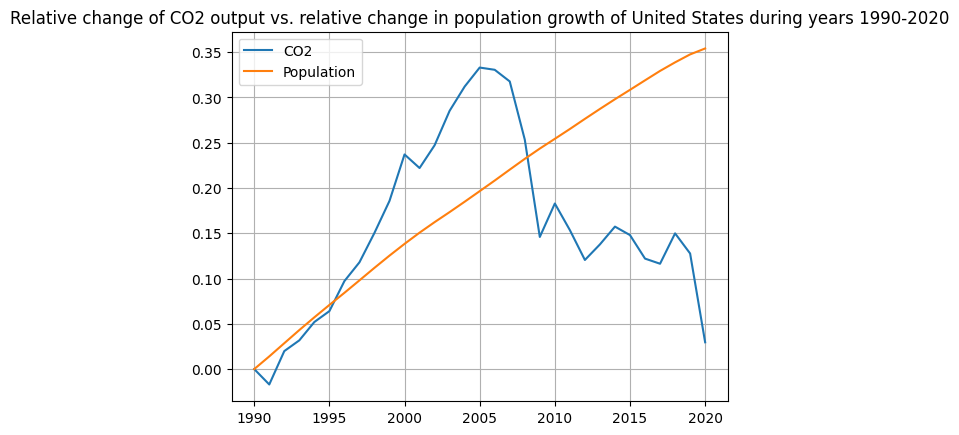

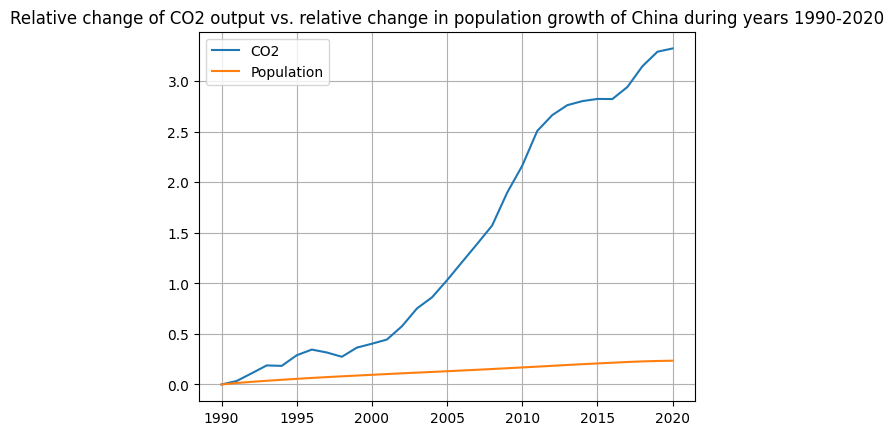

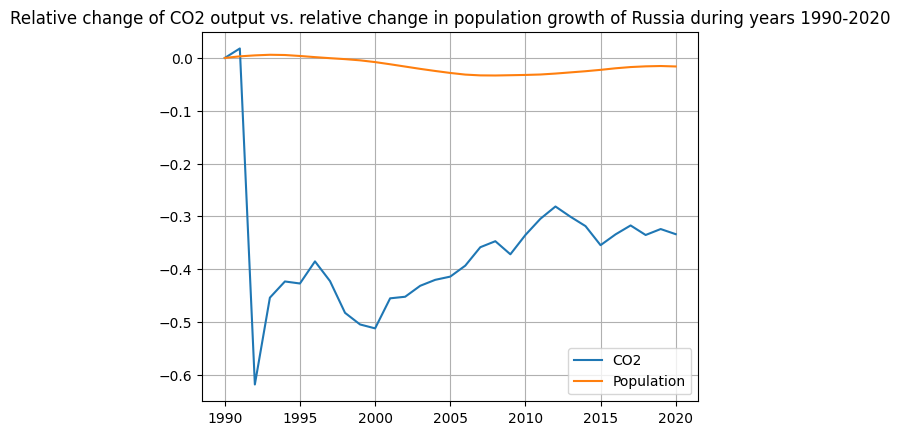

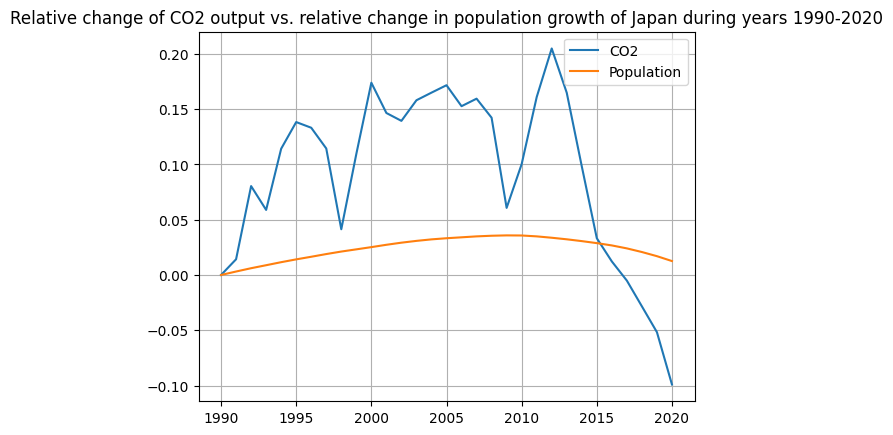

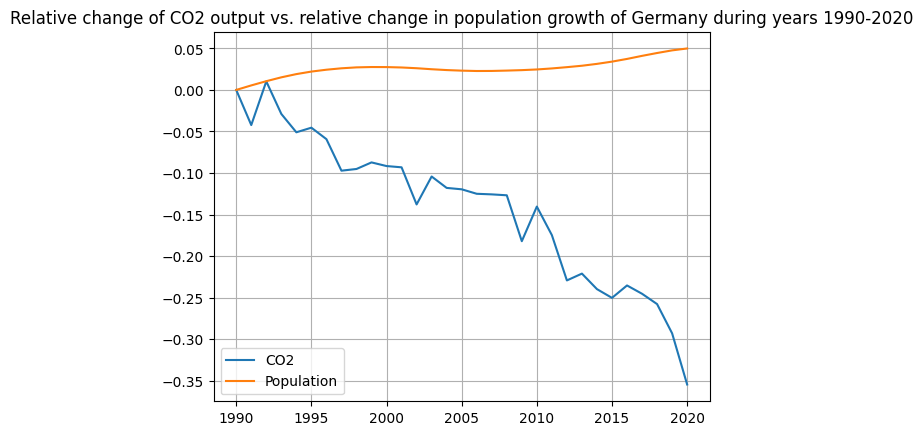

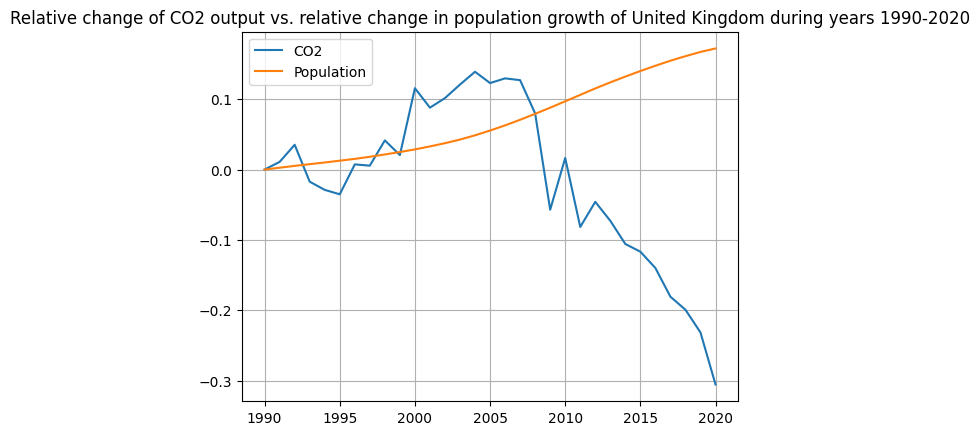

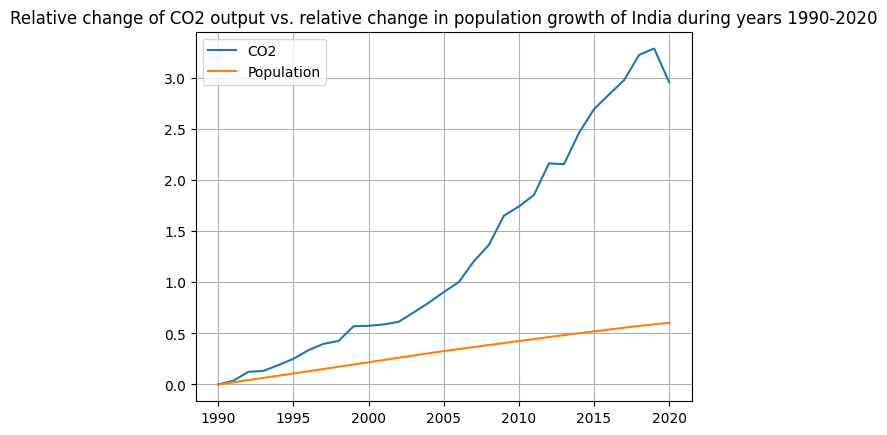

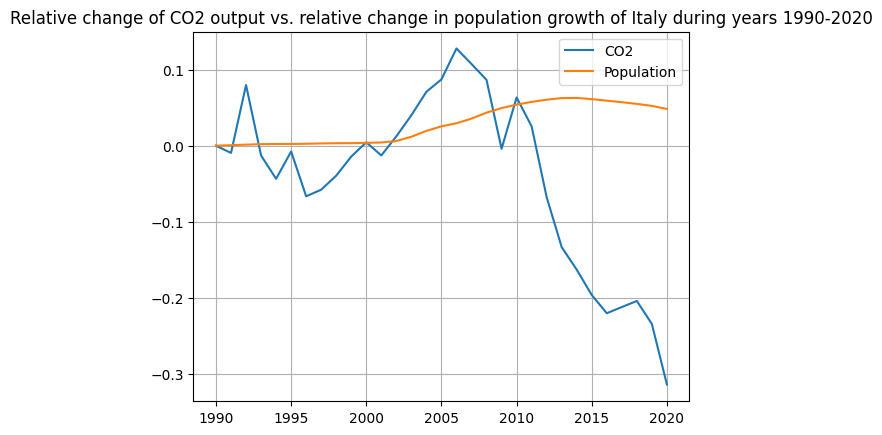

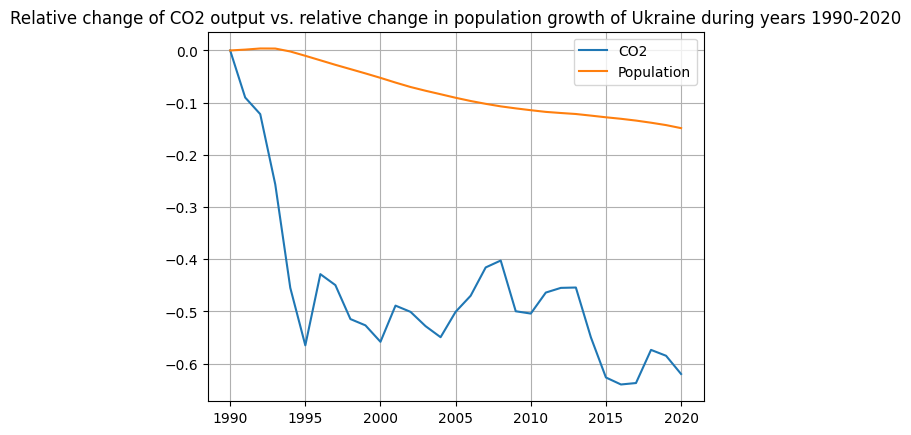

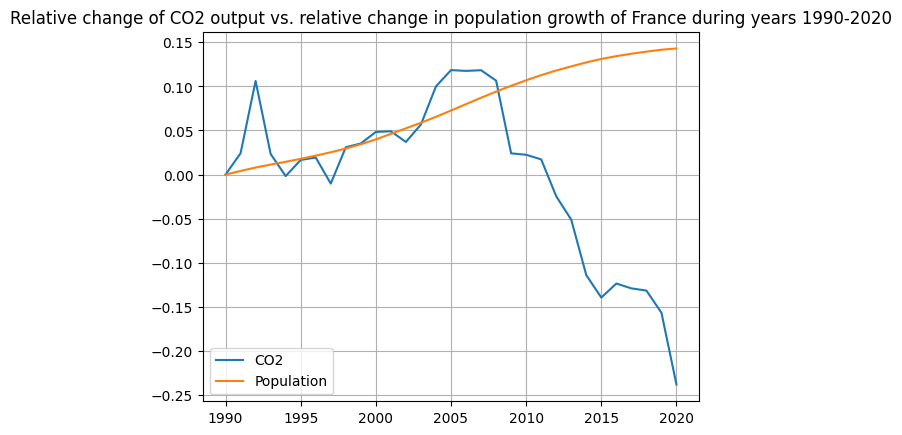

In [ ]:
top1990 = ['United States', 'China', 'Russia', 'Japan', 'Germany','United Kingdom', 'India', 'Italy', 'Ukraine', 'France']

def make_graph (list):
    for country in list:
      graph_CO2_population(country,CO2_1990_graph, population1990_graph)

make_graph(top1990)